In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

# import libraries
import numpy as np
import pandas as pd
import nltk
import ast
import matplotlib.pyplot as plt
import re,random,os
import seaborn as sns
from nltk.corpus import stopwords
import string
from pprint import pprint as pprint

In [ ]:
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#plotting tools
import pyLDAvis
import pyLDAvis.gensim #dont skip this
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download("stopwords")
import gensim


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy
import gensim
import gensim.corpora as corpora

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Sem8/NLP/Exploded_data.csv")
data = data.drop("Unnamed: 0", axis=1)

In [ ]:
data.head(3)

,name,interests,affiliations,cited_by_graph,article_title,article_published_year,authors,journals,citations,h_index,i10_index,Descrption_citation,Unnamed: 12,publication_date,conference,publisher,description,link,key_words
0,Geetha Ganapathi,"['Pattern Recognition', 'Machine Learning']","Professor, P S G College of Technology","[{'year': 2014, 'citations': 2}, {'year': 2015...",['A fuzzy hybrid framework for offline signatu...,"['QbdPMtIAAAAJ:u5HHmVD_uO8C', 'QbdPMtIAAAAJ:u-...","{'G Ganapathi, NV Kumar', 'G Ganapathi, N Reth...",['Pattern Recognition and Machine Intelligence...,"{'all': 18, 'since_2018': 10}","{'all': 2, 'since_2018': 1}","{'all': 1, 'since_2018': 1}",[{'title': 'A fuzzy hybrid framework for offli...,NaN,"['2013', '2014/1/6', '2016', '2011']",['Pattern Recognition and Machine Intelligence...,"['Springer Berlin Heidelberg', 'IEEE', 'Spring...",Signatures are widely used means of personal v...,['https://link.springer.com/chapter/10.1007/97...,"[['fuzzy inference rules', 'fuzzy rough reduct..."
1,Geetha Ganapathi,"['Pattern Recognition', 'Machine Learning']","Professor, P S G College of Technology","[{'year': 2014, 'citations': 2}, {'year': 2015...",['A fuzzy hybrid framework for offline signatu...,"['QbdPMtIAAAAJ:u5HHmVD_uO8C', 'QbdPMtIAAAAJ:u-...","{'G Ganapathi, NV Kumar', 'G Ganapathi, N Reth...",['Pattern Recognition and Machine Intelligence...,"{'all': 18, 'since_2018': 10}","{'all': 2, 'since_2018': 1}","{'all': 1, 'since_2018': 1}",[{'title': 'A fuzzy hybrid framework for offli...,NaN,"['2013', '2014/1/6', '2016', '2011']",['Pattern Recognition and Machine Intelligence...,"['Springer Berlin Heidelberg', 'IEEE', 'Spring...",Signature verification is a highly complex and...,['https://link.springer.com/chapter/10.1007/97...,"[['fuzzy inference rules', 'fuzzy rough reduct..."
2,Geetha Ganapathi,"['Pattern Recognition', 'Machine Learning']","Professor, P S G College of Technology","[{'year': 2014, 'citations': 2}, {'year': 2015...",['A fuzzy hybrid framework for offline signatu...,"['QbdPMtIAAAAJ:u5HHmVD_uO8C', 'QbdPMtIAAAAJ:u-...","{'G Ganapathi, NV Kumar', 'G Ganapathi, N Reth...",['Pattern Recognition and Machine Intelligence...,"{'all': 18, 'since_2018': 10}","{'all': 2, 'since_2018': 1}","{'all': 1, 'since_2018': 1}",[{'title': 'A fuzzy hybrid framework for offli...,NaN,"['2013', '2014/1/6', '2016', '2011']",['Pattern Recognition and Machine Intelligence...,"['Springer Berlin Heidelberg', 'IEEE', 'Spring...",Bones that provide the structural support of t...,['https://link.springer.com/chapter/10.1007/97...,"[['fuzzy inference rules', 'fuzzy rough reduct..."


In [ ]:
data[data['description']=='']

,name,interests,affiliations,cited_by_graph,article_title,article_published_year,authors,journals,citations,h_index,i10_index,Descrption_citation,Unnamed: 12,publication_date,conference,publisher,description,link,key_words


In [ ]:
df_exp=data.copy()

In [ ]:
import math

def clean_description(description):
  if isinstance(description, float) and math.isnan(description):
    return ''
  else:
    return description.replace("[","").replace("]","").split('\',')


df_exp["description"] = df_exp["description"].apply(lambda x: clean_description(x))

In [ ]:
def clean_descriptions_v2(descriptions):
    cleaned = [desc.replace("\'", "").strip() for desc in descriptions if desc.strip()]
    return cleaned

df_exp['description'] = df_exp['description'].apply(clean_descriptions_v2)

In [ ]:
df_exp['description'][0]

['Signatures are widely used means of personal verification. This paper presents a fuzzy hybrid framework based person-dependent off-line signature verification using fuzzy inference rules in image contrast enhancement, fuzzy rough reduction for feature selection and Simplified fuzzy ARTMAP for verification. Three sets of experimental studies are conducted on CEDAR benchmark dataset and the results reported are comparable to other techniques in terms of classification accuracy and time.']

In [ ]:
k = df_exp[df_exp['description']==''].index.tolist()

In [ ]:
k

[]

In [ ]:
df_exp['description'][400]

['Vehicle Identification and Authentication System is developed for traffic monitoring. To prevent unauthorized vehicles from entering the private areas, vehicle based authentication technologies are employed. The captured color image of the vehicle is converted to gray scale image. Gray scale image is converted into binary image using Sliding Concentric Windows (SCW) method. Pixels are labelled into components based on pixel connectivity using Connected Component Analysis (CCA) technique. The labelled components are examined and detected license plate is processed to isolate characters. These characters are sent to Probabilistic Neural Network (PNN). PNN uses a supervised training set to develop distributed functions within a pattern layer. Vehicle entering an area is considered as authenticated if it is registered. Registered vehicles’ number plate indicates the state and district to which particular vehicle belongs to. Vehicles are considered to be authenticated, if it belongs to a 

In [ ]:
authors = data.name.unique().tolist()

In [ ]:
author1 = data.name.unique().tolist()

In [ ]:
set(author1).difference(set(authors))

set()

In [ ]:
# tokenize using gensims simple_preprocess
def sent_to_words(sentences, deacc=True):  # deacc=True removes punctuations
    for sentence in sentences:
        yield(simple_preprocess(str(sentence)))

In [ ]:
def lemmatization(texts,allowed_postags=['NOUN','ADJ','VERB','ADV']):
    """https://spacy.io/api/annotation"""
    texts_out=[]
    for sent in texts:
        doc=nlp(' '.join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
stop_words= stopwords.words('english') + list(string.punctuation)

words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there",
                    "all","we","one","the","a","an","of","or","in","for","by","on","but","is","in",
                    "a","not","with","as","was","if","they","are","this","and","it","have","from","at",
                    "my","be","by","not","that","to","from","com","org","like","likes","so","said","from",
                    "what","told","over","more","other","have","last","with","this","that","such","when",
                    "been","says","will","also","where","why","would","today", "in", "on", "you", "r", "d",
                    "u", "hw","wat", "oly", "s", "b", "ht", "rt", "p","the","th", "lol", ':']

#remove stop words, punctuations
stop_words = set(list(stopwords.words('english') + list(string.punctuation)+words_remove))
data_words= list(sent_to_words(df_exp.description.values.tolist(), deacc=False))

# remove stopwords
def remove_stopwords(texts, stop_words=stop_words):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_words_nostops = remove_stopwords(data_words)


# spacy for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range,alpha_range):
    coherence_values=[]
    model_list=[]

    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, alpha=alpha,num_topics=num_topics,\
                                                      per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel=CoherenceModel(model=lda_model,texts=texts,dictionary=dictionary,coherence='c_v')
            coherence_values.append((alpha,num_topics,coherencemodel.get_coherence()))

    return model_list,coherence_values

In [ ]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range,alpha_range):
    coherence_values=[]
    model_list=[]

    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, alpha=alpha,num_topics=num_topics,\
                                                      per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel=CoherenceModel(model=lda_model,texts=texts,dictionary=dictionary,coherence='c_v')
            coherence_values.append((alpha,num_topics,coherencemodel.get_coherence()))

    return model_list,coherence_values

In [ ]:
data_lemmatized

[['signature',
  'widely',
  'use',
  'mean',
  'personal',
  'verification',
  'paper',
  'present',
  'fuzzy',
  'hybrid',
  'framework',
  'base',
  'person',
  'dependent',
  'line',
  'signature',
  'verification',
  'use',
  'fuzzy',
  'inference',
  'rule',
  'image',
  'contrast',
  'enhancement',
  'fuzzy',
  'rough',
  'reduction',
  'feature',
  'selection',
  'simplify',
  'fuzzy',
  'artmap',
  'verification',
  'set',
  'experimental',
  'study',
  'conduct',
  'cedar',
  'benchmark',
  'dataset',
  'result',
  'report',
  'comparable',
  'technique',
  'term',
  'classification',
  'accuracy',
  'time'],
 ['signature',
  'verification',
  'highly',
  'complex',
  'challenge',
  'task',
  'paper',
  'present',
  'similarity',
  'measure',
  'base',
  'person',
  'dependent',
  'line',
  'signature',
  'verification',
  'use',
  'fuzzy',
  'technique',
  'image',
  'contrast',
  'enhancement',
  'feature',
  'extraction',
  'verification',
  'set',
  'experimental',
  'stu

In [ ]:
# build models across a range of num_topics and alpha
num_topics_range=[2,6,10,15]
alpha_range=[0.01,0.1,1]
model_list, coherence_values=compute_coherence_values(dictionary=id2word,corpus=corpus,texts=data_lemmatized,
                                                      num_topics_range=num_topics_range,
                                                     alpha_range=alpha_range)

coherence_df = pd.DataFrame(coherence_values,columns=['alpha','num_topics','coherence_value'])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
coherence_df.info

<bound method DataFrame.info of     alpha  num_topics  coherence_value
0    0.01           2         0.266005
1    0.01           6         0.245216
2    0.01          10         0.270811
3    0.01          15         0.252981
4    0.10           2         0.269117
5    0.10           6         0.254760
6    0.10          10         0.259614
7    0.10          15         0.273986
8    1.00           2         0.271366
9    1.00           6         0.267860
10   1.00          10         0.256917
11   1.00          15         0.261714>

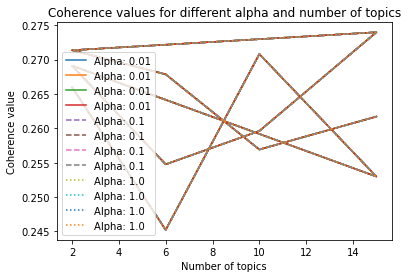

In [ ]:
# Define the line styles for different alpha values
line_styles = ['-', '-', '-', '-', '--', '--', '--', '--', ':', ':', ':', ':']

# Plot the graph
for i in range(len(coherence_df['alpha'])):
    plt.plot(coherence_df['num_topics'], coherence_df['coherence_value'], linestyle=line_styles[i], label='Alpha: {}'.format(coherence_df['alpha'][i]))

# Add title and axis labels
plt.title('Coherence values for different alpha and number of topics')
plt.xlabel('Number of topics')
plt.ylabel('Coherence value')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Build LDA model with alpha=0.1 and 10 topics
lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=100,\
                                          update_every=1,chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [ ]:
# print keywords
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.046*"user" + 0.031*"security" + 0.020*"system" + 0.018*"base" + '
  '0.015*"key" + 0.014*"provide" + 0.013*"use" + 0.012*"application" + '
  '0.011*"recommendation" + 0.009*"encryption"'),
 (1,
  '0.055*"network" + 0.030*"sensor" + 0.014*"communication" + 0.014*"cloud" + '
  '0.014*"node" + 0.013*"application" + 0.012*"wireless" + 0.012*"protocol" + '
  '0.012*"energy" + 0.011*"propose"'),
 (2,
  '0.035*"use" + 0.030*"datum" + 0.018*"propose" + 0.016*"method" + '
  '0.015*"technique" + 0.013*"base" + 0.013*"result" + 0.011*"information" + '
  '0.011*"paper" + 0.011*"model"'),
 (3,
  '0.050*"image" + 0.035*"feature" + 0.031*"use" + 0.028*"classification" + '
  '0.018*"detection" + 0.018*"attack" + 0.014*"propose" + 0.012*"accuracy" + '
  '0.012*"technique" + 0.010*"class"'),
 (4,
  '0.018*"web" + 0.015*"emotion" + 0.014*"search" + 0.013*"retrieval" + '
  '0.013*"system" + 0.013*"article" + 0.012*"content" + 0.012*"help" + '
  '0.011*"make" + 0.010*"document"'),
 (5,
  '0.018*"

In [ ]:
# coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.35148241022327514


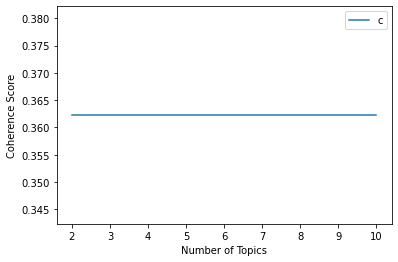

In [ ]:
# define your LDA model and data_lemmatized and id2word variables here

coherence_values = []
model_list = []
for num_topics in range(2, 11):
    lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=100,
                                          update_every=1,chunksize=100, passes=10, alpha='auto', per_word_topics=True)

    # calculate the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    # save the model and coherence score
    model_list.append(lda_model)
    coherence_values.append(coherence_lda)

# plot the coherence scores
plt.plot(range(2, 11), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()


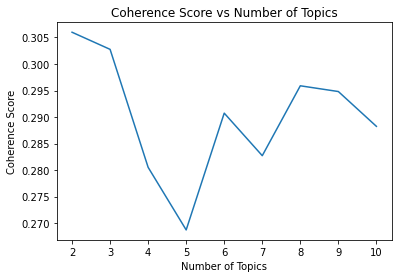

In [ ]:
# Define the data
coherence_scores = []
num_topics = range(2, 11)

# Loop through the number of topics and calculate coherence score
for k in num_topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=k,
                                                random_state=100,
                                                update_every=1,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_scores.append(coherence_model_lda.get_coherence())

# Plot the graph
plt.plot(num_topics, coherence_scores)
plt.title('Coherence Score vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

# Show the plot
plt.show()

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,mds='mmds')
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.284730  0.089153       1        1  22.330658
5      0.000066  0.072441       2        1  13.643365
3     -0.229195  0.273585       3        1  11.781126
1      0.272466 -0.215372       4        1  10.976760
0      0.287275 -0.010469       5        1  10.588482
8      0.266639  0.199352       6        1   9.959215
4      0.060269  0.336191       7        1   7.545591
6      0.029083 -0.336015       8        1   5.087455
7     -0.289440 -0.176210       9        1   4.460330
9     -0.112433 -0.232657      10        1   3.627018, topic_info=           Term        Freq       Total Category  logprob  loglift
708     network  326.000000  326.000000  Default  30.0000  30.0000
17        image  287.000000  287.000000  Default  29.0000  29.0000
29         rule  166.000000  166.000000  Default  28.0000  28.0000
1010       user  245.000000  245.000000  Default  27.0000  27.0000
13      feature  199.000000  199.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1629  multipath    7.494469   11.871830  Topic10  -5.4366   2.8568
27       result   12.445107  205.925570  Topic10  -4.9294   0.5106
38          use   14.484202  740.210672  Topic10  -4.7777  -0.6171
285     various    8.729544  114.520781  Topic10  -5.2840   0.7427
64         show    8.131714   97.568098  Topic10  -5.3550   0.8320

[567 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
682       2  0.987569   ability
1396      5  0.983241    access
0         3  0.754476  accuracy
0         4  0.170365  accuracy
0         5  0.073014  accuracy
...     ...       ...       ...
3596      4  0.958209  workload
2240      4  0.984554       wsn
456       2  0.232825     yield
456       9  0.737281     yield
4280     10  0.890932    zigbee

[950 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 4, 2, 1, 9, 5, 7, 8, 10])

In [ ]:
#data = data.reset_index(drop = True)

OLD2

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 45.1 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=a969d675aa4c0623bf18408ee4f8e836f5797af5c3dd7e50f43fb44407407cc1
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --force-reinstall joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
!pip install joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 17.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
pyldavis 3.4.0 requires joblib>=1.2.0, but you have joblib 1.1.0 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [ ]:
import nltk
import gensim
import gensim.corpora as corpora
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
max_features= 1000, # keep top 1000 terms
max_df = 0.5,
smooth_idf=True)

#X = vectorizer.fit_transform(data['description'])

#X.shape # check shape of the document-term matrix
#terms = vectorizer.get_feature_names_out()

In [ ]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

In [ ]:
hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
vectorizer_model = CountVectorizer(stop_words="english")

In [ ]:
ctfidf_model = ClassTfidfTransformer()

In [ ]:
topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  nr_topics="auto"                  # Step 6 - Diversify topic words
)

In [ ]:
data_copy=data.copy()

In [ ]:
data[data['description'].isnull()].index.tolist()

[]

In [ ]:
'''
data.drop([58], axis = 0, inplace = True)
data.reset_index(drop = True, inplace = True)
'''

'\ndata.drop([58], axis = 0, inplace = True)\ndata.reset_index(drop = True, inplace = True)\n'

In [ ]:
df_exp['description'] = df_exp['description'].astype(str)

In [ ]:
topics, probabilities = topic_model.fit_transform(df_exp['description'])

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,74,-1_rfid_search_data_based
1,0,124,0_image_using_images_learning
2,1,66,1_security_authentication_key_protocol
3,2,62,2_user_web_users_recommendation
4,3,50,3_network_sensor_energy_nodes
5,4,34,4_insertion_deletion_length_matrix
6,5,32,5_server_retrial_customers_service
7,6,32,6_scheduling_optimization_dpso_cloud
8,7,30,7_malware_detection_botnets_attacks
9,8,28,8_data_rules_sensitive_mining


In [ ]:
topics[:5]

In [ ]:
representative_doc = topic_model.get_representative_docs(topics[4])
representative_doc

Topic -1 refers to a cluster of documents that could not be possibly classified into other topics and so we can ignore that one.


In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap( )

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(df_exp['description'])
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 11/11 [00:00<00:00, 174.94it/s]
/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead



In [ ]:
similar_topics, similarity = topic_model.find_topics("security_authentication_protocol_key", top_n = 3)

In [ ]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(topic_model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('security', 0.05721905461787428), ('authentication', 0.04310650626940127), ('key', 0.036544307979361486), ('protocol', 0.03140736904633427), ('encryption', 0.027548622918455196), ('data', 0.026935772668878238), ('iot', 0.02616565359153216), ('image', 0.02446297923656129), ('communication', 0.02186492813652597), ('secure', 0.021625830243012244)]
Similarity Score: 0.4169111729019355


In [ ]:
filtered_text = df_exp['description']
documents = pd.DataFrame({"Document": filtered_text,
                          "ID": range(len(filtered_text)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
len(topic_words)

12

In [ ]:
topic_words

[['image',
  'using',
  'images',
  'learning',
  'proposed',
  'model',
  'classification',
  'used',
  'segmentation',
  'based'],
 ['security',
  'authentication',
  'key',
  'protocol',
  'encryption',
  'data',
  'iot',
  'image',
  'communication',
  'secure'],
 ['user',
  'web',
  'users',
  'recommendation',
  'similarity',
  'learning',
  'based',
  'information',
  'news',
  'search'],
 ['network',
  'sensor',
  'energy',
  'nodes',
  'wireless',
  'networks',
  'wsn',
  'lifetime',
  'mobile',
  'routing'],
 ['insertion',
  'deletion',
  'length',
  'matrix',
  'string',
  'grammars',
  'context',
  'systems',
  'graph',
  'rules'],
 ['server',
  'retrial',
  'customers',
  'service',
  'orbit',
  'time',
  'calls',
  'fractional',
  'type',
  'state'],
 ['scheduling',
  'optimization',
  'dpso',
  'cloud',
  'algorithm',
  'swarm',
  'task',
  'resources',
  'discrete',
  'computing'],
 ['malware',
  'detection',
  'botnets',
  'attacks',
  'botnet',
  'based',
  'malicious

In [ ]:
print(coherence)

0.69972944581741


# Recommendar

In [ ]:
topic_freq = topic_model.get_topic_freq()

# Create a dictionary that maps document IDs to topics
doc_topic_map = {}
for i, (doc, _) in enumerate(zip(data['description'], probabilities)):
    topic_id = topics[i]
    if topic_id not in doc_topic_map:
        doc_topic_map[topic_id] = []
    doc_topic_map[topic_id].append(i)

# Map each document to its corresponding topic and author
for topic_id, doc_ids in doc_topic_map.items():
    topic_words = topic_model.get_topic(topic_id)[1]
    print(f"Topic {topic_id}: {topic_words}")
    for doc_id in doc_ids:
        print(f"\t- Description: {data['description'][doc_id]}")
        print(f"\t  Author: {data['name'][doc_id]}")

Topic 0: ('using', 0.028377047781622953)
	- Description: Signatures are widely used means of personal verification. This paper presents a fuzzy hybrid framework based person-dependent off-line signature verification using fuzzy inference rules in image contrast enhancement, fuzzy rough reduction for feature selection and Simplified fuzzy ARTMAP for verification. Three sets of experimental studies are conducted on CEDAR benchmark dataset and the results reported are comparable to other techniques in terms of classification accuracy and time.
	  Author: Geetha Ganapathi
	- Description: Signature verification is a highly complex and challenging task. This paper presents a similarity measure based person-dependent off-line signature verification using fuzzy techniques in image contrast enhancement, feature extraction and verification. Two sets of experimental studies are conducted on CEDAR benchmark dataset and the results are reported. First, experiments are conducted on the signature ima

Topic 0: ('using', 0.028377047781622953)
	- Top authors: Prakash Jagadeesan, kaja mohideen, Dr. Suriya Sundaramoorthy, Dr.Vinoth Kumar Balasubramanian, Dr. P. Sivakumar


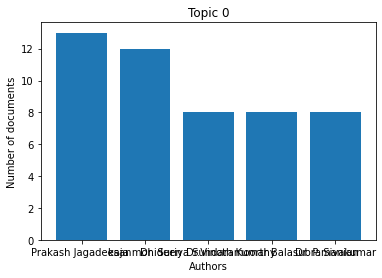

Topic -1: ('search', 0.025729459662298018)
	- Top authors: sai sundara Krishnan, Sreeja N.K, Sreelaja N.K, S Anandhi, Venkatasamy Sureshkumar


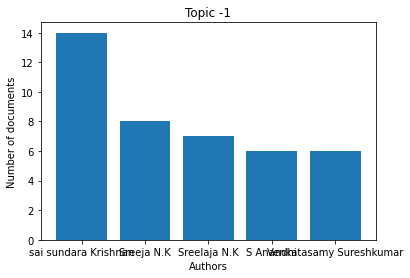

Topic 1: ('authentication', 0.04310650626940127)
	- Top authors: Venkatasamy Sureshkumar, R Venkatesan, Dr. K. Anitha Kumari, T Anusha, Vijayalakshmi Subramani


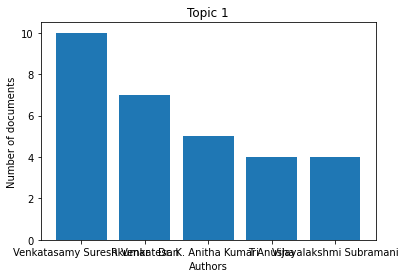

Topic 2: ('web', 0.049896648676197836)
	- Top authors: Dr.V Senthil Kumaran, Latha R, poomagal shanmugam, K G Saranya, Indumathi D


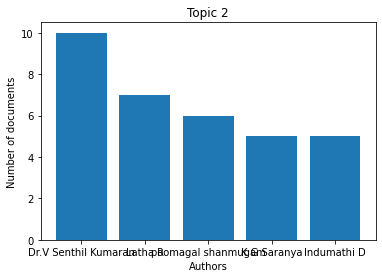

Topic 3: ('sensor', 0.06850071447764457)
	- Top authors: R Venkatesan, Jayashree L.S., Regis Anne W, Dr. Santhi Venkatraman, vairam T


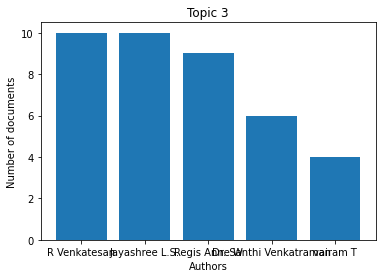

Topic 4: ('deletion', 0.1092254796708583)
	- Top authors: Indhumathi Raman, Jeevadoss .S


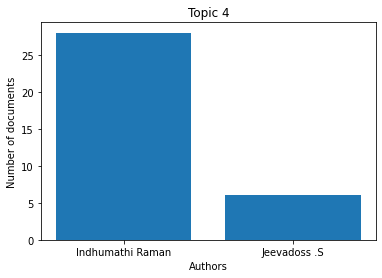

Topic 5: ('retrial', 0.07209258148880687)
	- Top authors: Muthukrishnan, Senthil Kumar, sai sundara Krishnan, Nishanthi Dhanasekaran, Dr. T. Karthick


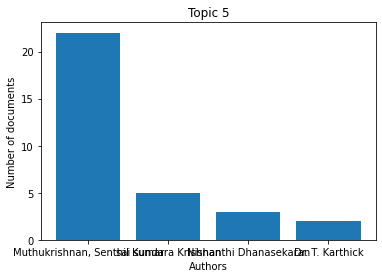

Topic 6: ('optimization', 0.06112443068194393)
	- Top authors: S.Sarathambekai, G Sudha Sadasivam, radhika E G, Dr. Suriya Sundaramoorthy, Dr. Santhi Venkatraman


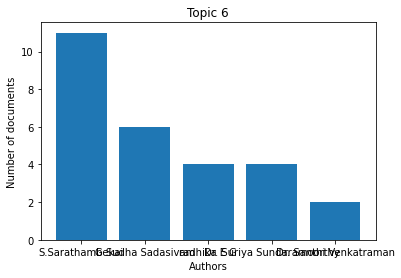

Topic 7: ('detection', 0.06837842024132497)
	- Top authors: Shina Sheen, Dr.G.Kirubavathi, Shymala Gowri Selvaganapathy, Padmashani R, Sreelaja N.K


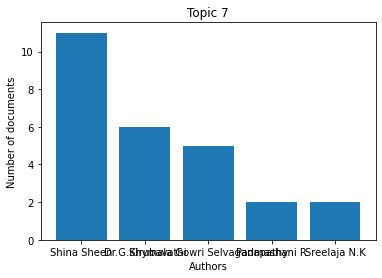

Topic 8: ('rules', 0.10534445338310955)
	- Top authors: Sathiyapriya K, Sangeetha S, G Sudha Sadasivam, Dr. Suriya Sundaramoorthy, Thirumahal Rajkumar


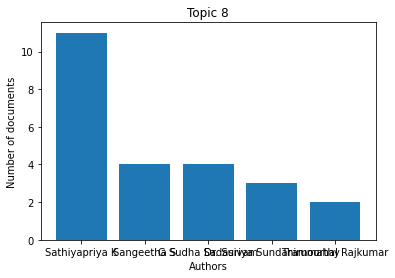

Topic 9: ('bloom', 0.06768450913541979)
	- Top authors: Dr. N Arulanand, Karthika Renuka, poomagal shanmugam, Umamaheswari Kandaswamy, Lovelyn Rose


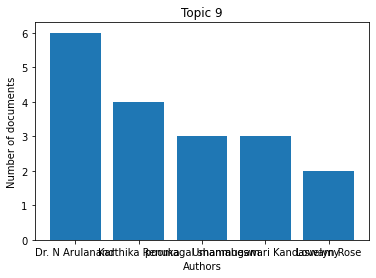

Topic 10: ('problem', 0.10977419079502282)
	- Top authors: Dr. Poonthalir Ganesan, K G Saranya, Muthukrishnan, Senthil Kumar


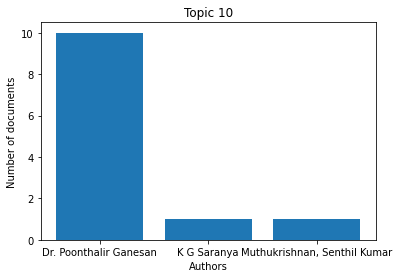

Topic 11: ('research', 0.11684011660923196)
	- Top authors: Shina Sheen, J Uma Maheswari, Muthukrishnan, Senthil Kumar, Sreelaja N.K, sai sundara Krishnan


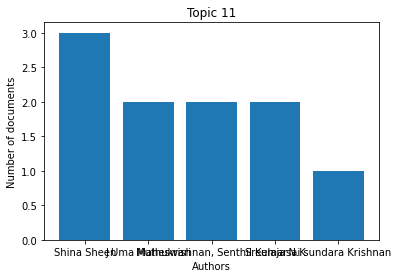

In [ ]:
import matplotlib.pyplot as plt

# Get the topic frequencies
topic_freq = topic_model.get_topic_freq()

# Create a dictionary that maps document IDs to topics
doc_topic_map = {}
for i, (doc, _) in enumerate(zip(data['description'], probabilities)):
    topic_id = topics[i]
    if topic_id not in doc_topic_map:
        doc_topic_map[topic_id] = []
    doc_topic_map[topic_id].append(i)

# Create a dictionary that maps authors to topics
author_topic_map = {}
for i, author in enumerate(data['name']):
    topic_id = topics[i]
    if author not in author_topic_map:
        author_topic_map[author] = {}
    if topic_id not in author_topic_map[author]:
        author_topic_map[author][topic_id] = 0
    author_topic_map[author][topic_id] += 1

# Get the author frequencies for each topic
author_freqs = {}
for topic_id in topic_freq['Topic']:
    topic_docs = doc_topic_map[topic_id]
    topic_authors = set(data['name'][topic_docs])
    for author in topic_authors:
        if author not in author_freqs:
            author_freqs[author] = {}
        author_freqs[author][topic_id] = sum([author_topic_map[author][topic_id] for doc_id in topic_docs if data['name'][doc_id] == author])

# Get the top authors for each topic
top_authors = {}
for topic_id in topic_freq['Topic']:
    topic_author_freqs = [(author, freq) for author, freq in author_freqs.items() if topic_id in freq]
    topic_author_freqs = sorted(topic_author_freqs, key=lambda x: x[1][topic_id], reverse=True)[:5]

    top_authors[topic_id] = [author for author, freq in topic_author_freqs]

# Plot the author clusters
for topic_id in topic_freq['Topic']:
    topic_words = topic_model.get_topic(topic_id)[1]
    print(f"Topic {topic_id}: {topic_words}")
    authors = top_authors[topic_id]
    print(f"\t- Top authors: {', '.join(authors)}")
    topic_docs = doc_topic_map[topic_id]
    topic_authors = set(data['name'][topic_docs])
    topic_author_counts = [len([doc_id for doc_id in topic_docs if data['name'][doc_id] == author]) for author in authors]
    plt.bar(authors, topic_author_counts)
    plt.title(f"Topic {topic_id}")
    plt.xlabel("Authors")
    plt.ylabel("Number of documents")
    plt.show()

In [ ]:
author_name = 'R Venkatesan'
topic_id = 0
related_authors = top_authors[topic_id]
#related_authors.remove(author_name)
print(f"Authors related to {author_name} in topic {topic_id}: {', '.join(related_authors)}")

Authors related to R Venkatesan in topic 0: Prakash Jagadeesan, kaja mohideen, Dr. Suriya Sundaramoorthy, Dr.Vinoth Kumar Balasubramanian, Dr. P. Sivakumar
